In [ ]:
from google.colab import files
uploaded=files.upload()

Saving E-commerce Customer Behavior - Sheet1 2.csv to E-commerce Customer Behavior - Sheet1 2.csv


In [ ]:
import pandas as pd
df=pd.read_csv("E-commerce Customer Behavior - Sheet1 2.csv")
df.head()

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied


In [ ]:
df["Discount Applied"]=df["Discount Applied"].map({True:1,False:0})
df.head()

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,1,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,0,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,1,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,0,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,1,55,Unsatisfied


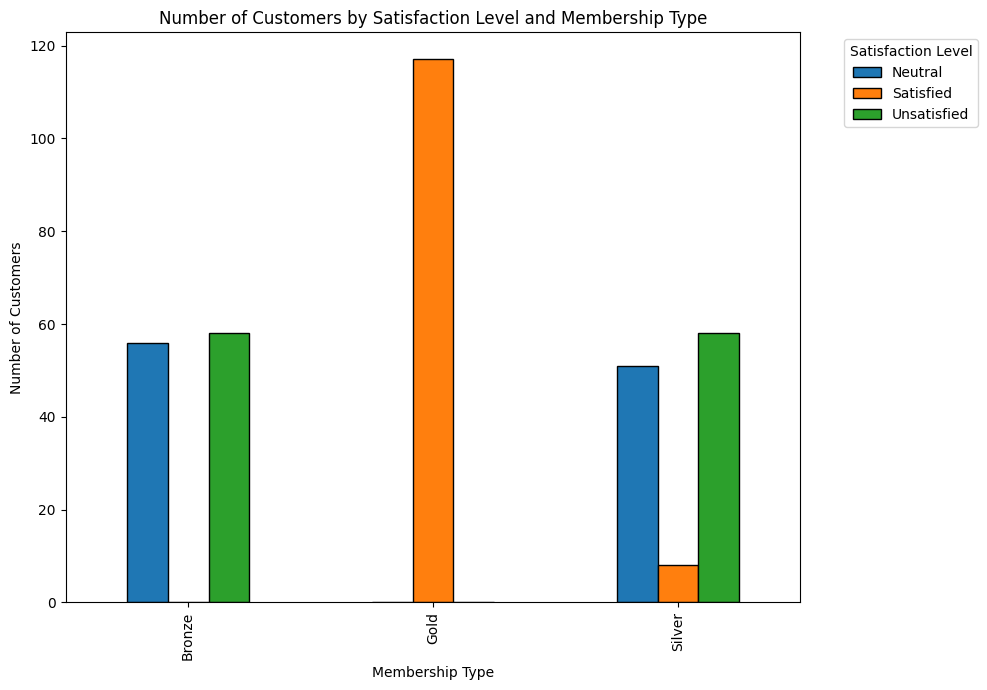

In [ ]:
import matplotlib.pyplot as plt


satisfaction_counts = df.groupby(['Membership Type', 'Satisfaction Level']).size().reset_index(name='Count')


satisfaction_pivot = satisfaction_counts.pivot(index='Membership Type', columns='Satisfaction Level', values='Count').fillna(0)


satisfaction_pivot.plot(kind='bar', stacked=False, figsize=(10, 7), edgecolor='black')

plt.title('Number of Customers by Satisfaction Level and Membership Type')
plt.xlabel('Membership Type')
plt.ylabel('Number of Customers')
plt.legend(title='Satisfaction Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()


plt.show()


In [ ]:
df.isna().sum()

,0
Customer ID,0
Gender,0
Age,0
City,0
Membership Type,0
Total Spend,0
Items Purchased,0
Average Rating,0
Discount Applied,0
Days Since Last Purchase,0


In [ ]:
df=df.dropna()

In [ ]:
df.isna().sum()

,0
Customer ID,0
Gender,0
Age,0
City,0
Membership Type,0
Total Spend,0
Items Purchased,0
Average Rating,0
Discount Applied,0
Days Since Last Purchase,0


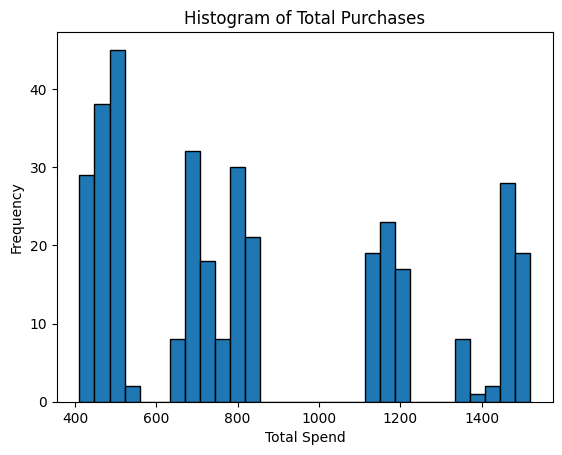

Number of outliers: 0
Outlier values:
 Empty DataFrame
Columns: [Customer ID, Gender, Age, City, Membership Type, Total Spend, Items Purchased, Average Rating, Discount Applied, Days Since Last Purchase, Satisfaction Level]
Index: []


In [ ]:
import matplotlib.pyplot as plt
Q1 = df['Total Spend'].quantile(0.25)
Q3 = df['Total Spend'].quantile(0.75)


IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


outliers = df[(df['Total Spend'] < lower_bound) | (df['Total Spend'] > upper_bound)]

plt.hist(df['Total Spend'], bins=30, edgecolor='black')
plt.title('Histogram of Total Purchases')
plt.xlabel('Total Spend')
plt.ylabel('Frequency')
plt.show()

print(f"Number of outliers: {outliers.shape[0]}")
print("Outlier values:\n", outliers)

In [ ]:

gold_cust=df[df['Membership Type']=="Gold"]

control_group = gold_cust[gold_cust['Discount Applied'] == 0]  # Customers without discounts
treatment_group = gold_cust[gold_cust['Discount Applied'] == 1]  # Customers with discounts

print(f"Control group size: {control_group.shape[0]}")
print(f"Treatment group size: {treatment_group.shape[0]}")


Control group size: 58
Treatment group size: 59


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


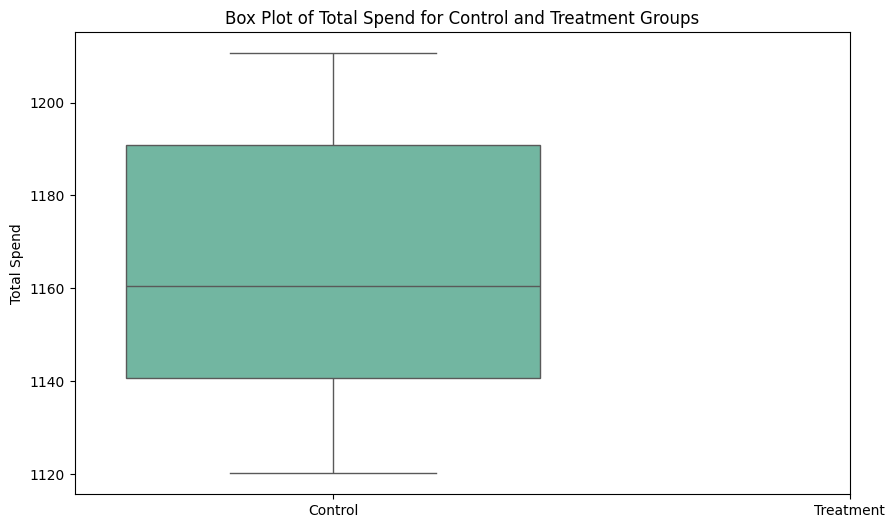

Number of outliers in Control group: 9
Number of outliers in Treatment group: 0


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10, 6))


sns.boxplot(data=[control_group['Total Spend'], treatment_group['Total Spend']], palette="Set2")
plt.xticks([0, 1], ['Control', 'Treatment'])
plt.title('Box Plot of Total Spend for Control and Treatment Groups')
plt.ylabel('Total Spend')
plt.show()

Q1_control = control_group['Total Spend'].quantile(0.25)
Q3_control = control_group['Total Spend'].quantile(0.75)
IQR_control = Q3_control - Q1_control

lower_bound_control = Q1_control - 1.5 * IQR_control
upper_bound_control = Q3_control + 1.5 * IQR_control


control_outliers = control_group[(control_group['Total Spend'] < lower_bound_control) | (control_group['Total Spend'] > upper_bound_control)]

Q1_treatment = treatment_group['Total Spend'].quantile(0.25)
Q3_treatment = treatment_group['Total Spend'].quantile(0.75)
IQR_treatment = Q3_treatment - Q1_treatment

lower_bound_treatment = Q1_treatment - 1.5 * IQR_treatment
upper_bound_treatment = Q3_treatment + 1.5 * IQR_treatment

treatment_outliers = treatment_group[(treatment_group['Total Spend'] < lower_bound_treatment) | (treatment_group['Total Spend'] > upper_bound_treatment)]

print(f"Number of outliers in Control group: {control_outliers.shape[0]}")
print(f"Number of outliers in Treatment group: {treatment_outliers.shape[0]}")


In [ ]:

control_groupnew = control_group[(control_group['Total Spend'] >= lower_bound_control) &
                              (control_group['Total Spend'] <= upper_bound_control)]


print(f"Original Control group size: {len(control_group)}")
print(f"Control group size after removing outliers: {len(control_groupnew)}")


Original Control group size: 58
Control group size after removing outliers: 49


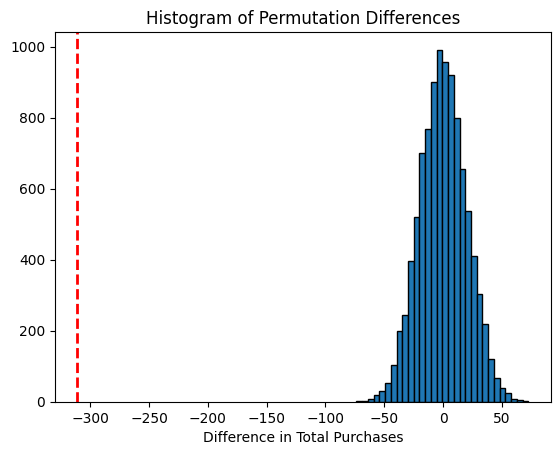

Observed difference in means: -310.9848149429263
P-value from permutation test: 0.0


In [ ]:
import numpy as np


total_purchases = np.concatenate([control_groupnew, treatment_group])

mean_control = np.mean(control_groupnew["Total Spend"])
mean_treatment = np.mean(treatment_group["Total Spend"])
observed_diff = mean_treatment - mean_control


def perm_fun(purchases, n_control, n_treatment):
    n = n_control + n_treatment
    idx_treatment = np.random.choice(range(n), n_treatment, replace=False)
    idx_control = np.setdiff1d(range(n), idx_treatment)


    mean_diff = np.mean(purchases[idx_treatment]) - np.mean(purchases[idx_control])
    return mean_diff


perm_diffs = np.zeros(10000)


for i in range(10000):
    perm_diffs[i] = perm_fun(total_purchases[:, 0], len(control_groupnew), len(treatment_group))


plt.hist(perm_diffs, bins=30, edgecolor='black')
plt.axvline(x=observed_diff, color='red', linestyle='dashed', linewidth=2)
plt.xlabel('Difference in Total Purchases')
plt.title('Histogram of Permutation Differences')
plt.show()

p_value = np.mean(np.abs(perm_diffs) >= np.abs(observed_diff))
print(f"Observed difference in means: {observed_diff}")
print(f"P-value from permutation test: {p_value}")




In [ ]:

p_value = np.mean(np.abs(perm_diffs) >= np.abs(observed_diff))
print(f"Observed difference in means: {observed_diff}")
print(f"P-value from permutation test: {p_value}")

lower_bound = np.percentile(perm_diffs, 2.5)
upper_bound = np.percentile(perm_diffs, 97.5)
print(f"95% Confidence Interval for the difference in means: ({lower_bound}, {upper_bound})")

Observed difference in means: -310.9848149429263
P-value from permutation test: 0.0
95% Confidence Interval for the difference in means: (-39.12867519889312, 39.28526461432034)


In [ ]:
def cliffs_delta(x, y):
    n_x = len(x)
    n_y = len(y)
    greater = sum([1 if x_i > y_i else 0 for x_i in x for y_i in y])
    less = sum([1 if x_i < y_i else 0 for x_i in x for y_i in y])

    delta = (greater - less) / (n_x * n_y)
    return delta


cliff_delta = cliffs_delta(control_group['Total Spend'], treatment_group['Total Spend'])
print(f"Cliff's Delta: {cliff_delta}")


Cliff's Delta: 1.0


Exhaustive permutation

Further Analysis

silver customers

In [ ]:
sil_cust=df[df['Membership Type']=="Silver"]

control_group = sil_cust[sil_cust['Discount Applied'] == 0]  # Customers without discounts
treatment_group = sil_cust[sil_cust['Discount Applied'] == 1]  # Customers with discounts

print(f"Control group size: {control_group.shape[0]}")
print(f"Treatment group size: {treatment_group.shape[0]}")

Control group size: 59
Treatment group size: 58


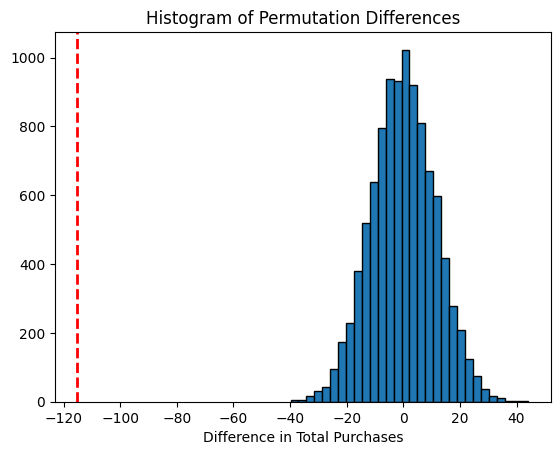

Observed difference in means: -115.10187025131495
P-value from permutation test: 0.0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt


mean_control = np.mean(control_group["Total Spend"])
mean_treatment = np.mean(treatment_group["Total Spend"])
observed_diff = mean_treatment - mean_control


def perm_fun(purchases, n_control, n_treatment):
    n = n_control + n_treatment
    idx_treatment = np.random.choice(range(n), n_treatment, replace=False)
    idx_control = np.setdiff1d(range(n), idx_treatment)

    mean_diff = np.mean(purchases[idx_treatment]) - np.mean(purchases[idx_control])
    return mean_diff

total_purchases = np.concatenate([control_group['Total Spend'].values, treatment_group['Total Spend'].values])

perm_diffs = np.zeros(10000)


for i in range(10000):
    perm_diffs[i] = perm_fun(total_purchases, len(control_group), len(treatment_group))


plt.hist(perm_diffs, bins=30, edgecolor='black')
plt.axvline(x=observed_diff, color='red', linestyle='dashed', linewidth=2)
plt.xlabel('Difference in Total Purchases')
plt.title('Histogram of Permutation Differences')
plt.show()


p_value = np.mean(np.abs(perm_diffs) >= np.abs(observed_diff))
print(f"Observed difference in means: {observed_diff}")
print(f"P-value from permutation test: {p_value}")


In [ ]:

p_value = np.mean(np.abs(perm_diffs) >= np.abs(observed_diff))
print(f"Observed difference in means: {observed_diff}")
print(f"P-value from permutation test: {p_value}")

# Calculate the 95% confidence interval from the permutation distribution
lower_bound = np.percentile(perm_diffs, 2.5)
upper_bound = np.percentile(perm_diffs, 97.5)
print(f"95% Confidence Interval for the difference in means: ({lower_bound}, {upper_bound})")

Observed difference in means: -115.10187025131495
P-value from permutation test: 0.0
95% Confidence Interval for the difference in means: (-21.96190385739343, 22.20405756867322)


In [ ]:
def cliffs_delta(x, y):
    n_x = len(x)
    n_y = len(y)
    greater = sum([1 if x_i > y_i else 0 for x_i in x for y_i in y])
    less = sum([1 if x_i < y_i else 0 for x_i in x for y_i in y])

    delta = (greater - less) / (n_x * n_y)
    return delta

cliff_delta = cliffs_delta(control_group['Total Spend'], treatment_group['Total Spend'])
print(f"Cliff's Delta: {cliff_delta}")

Cliff's Delta: 1.0


Bronze

In [ ]:
Bronze_cust=df[df['Membership Type']=="Bronze"]

control_group = Bronze_cust[Bronze_cust['Discount Applied'] == 0]  # Customers without discounts
treatment_group = Bronze_cust[Bronze_cust['Discount Applied'] == 1]  # Customers with discounts

print(f"Control group size: {control_group.shape[0]}")
print(f"Treatment group size: {treatment_group.shape[0]}")

Control group size: 56
Treatment group size: 58


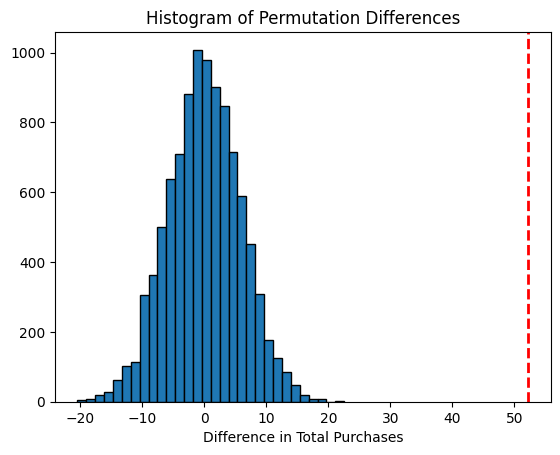

Observed difference in means: 52.23454433497534
P-value from permutation test: 0.0


In [ ]:

mean_control = np.mean(control_group["Total Spend"])
mean_treatment = np.mean(treatment_group["Total Spend"])
observed_diff = mean_treatment - mean_control


def perm_fun(purchases, n_control, n_treatment):
    n = n_control + n_treatment
    idx_treatment = np.random.choice(range(n), n_treatment, replace=False)
    idx_control = np.setdiff1d(range(n), idx_treatment)


    mean_diff = np.mean(purchases[idx_treatment]) - np.mean(purchases[idx_control])
    return mean_diff

total_purchases = Bronze_cust["Total Spend"].values


perm_diffs = np.zeros(10000)


for i in range(10000):
    perm_diffs[i] = perm_fun(total_purchases, len(control_group), len(treatment_group))


plt.hist(perm_diffs, bins=30, edgecolor='black')
plt.axvline(x=observed_diff, color='red', linestyle='dashed', linewidth=2)
plt.xlabel('Difference in Total Purchases')
plt.title('Histogram of Permutation Differences')
plt.show()


p_value = np.mean(np.abs(perm_diffs) >= np.abs(observed_diff))
print(f"Observed difference in means: {observed_diff}")
print(f"P-value from permutation test: {p_value}")

In [ ]:


p_value = np.mean(np.abs(perm_diffs) >= np.abs(observed_diff))
print(f"Observed difference in means: {observed_diff}")
print(f"P-value from permutation test: {p_value}")

# Calculate the 95% confidence interval from the permutation distribution
lower_bound = np.percentile(perm_diffs, 2.5)
upper_bound = np.percentile(perm_diffs, 97.5)
print(f"95% Confidence Interval for the difference in means: ({lower_bound}, {upper_bound})")

Observed difference in means: 52.23454433497534
P-value from permutation test: 0.0
95% Confidence Interval for the difference in means: (-11.420179341133052, 11.525567272167494)


In [ ]:
def cliffs_delta(x, y):
    n_x = len(x)
    n_y = len(y)
    greater = sum([1 if x_i > y_i else 0 for x_i in x for y_i in y])
    less = sum([1 if x_i < y_i else 0 for x_i in x for y_i in y])

    delta = (greater - less) / (n_x * n_y)
    return delta


cliff_delta = cliffs_delta(control_group['Total Spend'], treatment_group['Total Spend'])
print(f"Cliff's Delta: {cliff_delta}")

Cliff's Delta: -0.9932266009852216
